In [4]:
import os
import sys

current = os.path.abspath("")
parent = os.path.dirname(current)
sys.path.append(parent)

In [5]:
# test training
# test models

In [6]:
from swp.utils.datasets import (
    create_epoch,
    create_folds,
    create_test_data,
    create_train_data,
    get_phoneme_to_id,
    get_train_fold,
)
from swp.utils.setup import seed_everything
import numpy as np

seed_everything()
create_test_data()
train_df = create_train_data(50000)
generator = np.random.default_rng(seed=3407)
create_folds(train_df, num_folds=5, generator=generator)
for fold_id in range(5):
    fold_train_df = get_train_fold(fold_id)
    create_epoch(fold_id, fold_train_df, 100000, generator)
get_phoneme_to_id()

{'<PAD>': 0,
 '<SOS>': 1,
 '<EOS>': 2,
 'AA0': 3,
 'AA1': 4,
 'AA2': 5,
 'AE0': 6,
 'AE1': 7,
 'AE2': 8,
 'AH0': 9,
 'AH1': 10,
 'AH2': 11,
 'AO0': 12,
 'AO1': 13,
 'AO2': 14,
 'AW0': 15,
 'AW1': 16,
 'AW2': 17,
 'AY0': 18,
 'AY1': 19,
 'AY2': 20,
 'B': 21,
 'CH': 22,
 'D': 23,
 'DH': 24,
 'EH0': 25,
 'EH1': 26,
 'EH2': 27,
 'ER0': 28,
 'ER1': 29,
 'ER2': 30,
 'EY0': 31,
 'EY1': 32,
 'EY2': 33,
 'F': 34,
 'G': 35,
 'HH': 36,
 'IH0': 37,
 'IH1': 38,
 'IH2': 39,
 'IY0': 40,
 'IY1': 41,
 'IY2': 42,
 'JH': 43,
 'K': 44,
 'L': 45,
 'M': 46,
 'N': 47,
 'NG': 48,
 'OW0': 49,
 'OW1': 50,
 'OW2': 51,
 'OY0': 52,
 'OY1': 53,
 'OY2': 54,
 'P': 55,
 'R': 56,
 'S': 57,
 'SH': 58,
 'T': 59,
 'TH': 60,
 'UH0': 61,
 'UH1': 62,
 'UH2': 63,
 'UW0': 64,
 'UW1': 65,
 'UW2': 66,
 'V': 67,
 'W': 68,
 'Y': 69,
 'Z': 70,
 'ZH': 71}

In [4]:
import numpy as np
import pathlib

x = np.load(pathlib.Path(parent) / "stimuli" / "folds" / "epoch_fold_4.npy")

In [5]:
x = x[:1000]
np.save(pathlib.Path(parent) / "stimuli" / "folds" / "epoch_fold_3.npy", x)

In [7]:
import torch.nn as nn
import torch.optim as optim

from swp.datasets.phonemes import get_phoneme_trainloader
from swp.models.autoencoder import Unimodel
from swp.models.decoders import DecoderLSTM, DecoderRNN
from swp.models.encoders import EncoderLSTM, EncoderRNN
from swp.train.repetition import train
from swp.utils.datasets import get_phoneme_to_id
from swp.utils.models import (
    get_model,
    get_model_name,
    get_training_args,
    get_training_name,
)
from swp.utils.setup import seed_everything, set_device
from swp.models.losses import AuditoryXENT

seed_everything()
device = set_device()
training_name = get_training_name(
    1, 0.001, 3
)
batch_size = 10
learn_rate = 0.001
fold_id = 3
recur_type = "LSTM"
phoneme_to_id = get_phoneme_to_id()
vocab_size = len(phoneme_to_id)
if recur_type == "LSTM":
    encoder = EncoderLSTM(
        vocab_size=vocab_size,
        hidden_size=8,
        num_layers=1,
        dropout=0.2,
    )
    decoder = DecoderLSTM(
        vocab_size=vocab_size,
        hidden_size=8,
        num_layers=1,
        dropout=0.2,
        tf_ratio=0.2,
    )
model = Unimodel(
    encoder=encoder, decoder=decoder, start_token_id=phoneme_to_id["<SOS>"]
)
model_name = get_model_name(model)

train_loader = get_phoneme_trainloader(
    fold_id=fold_id,
    train=True,
    batch_size=batch_size,
    pad_to_length=0,
)
valid_loader = get_phoneme_trainloader(
    fold_id=fold_id,
    train=False,
    batch_size=batch_size,
    pad_to_length=0,
)
criterion = AuditoryXENT()
optimizer = optim.Adam(model.parameters(), lr=learn_rate)
train(
    train_loader=train_loader,
    valid_loader=train_loader,
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    model_name=model_name,
    training_name=training_name,
    num_epochs=2,
    verbose=True,
)

Using CPU device

Epoch 1


/home/obnyr/.local/lib/python3.12/site-packages/torch/nested/__init__.py:226: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  return _nested.nested_tensor(


Checkpoint 1: 3.694
Checkpoint 2: 3.386
Checkpoint 3: 3.220
Checkpoint 4: 3.111
Checkpoint 5: 3.031
Checkpoint 6: 2.965
Checkpoint 7: 2.910
Checkpoint 8: 2.865
Checkpoint 9: 2.827
Train loss: 2.790
Valid loss: 2.497
Epoch time: 0h 3m 217s

Epoch 2
Train loss: 2.334
Valid loss: 2.247
Epoch time: 0h 3m 233s

Timing Summary:
------------------------------------------------------------
Operation                      Total (s)      
------------------------------------------------------------
Train step                           152.902s

Error rate: 0.00


/home/obnyr/Documents/thesis/single-word-processing-model/swp/utils/grid_search.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, row_df], ignore_index=True)


In [3]:
from swp.datasets.graphemes.traindata_gen import create_gen_arg_dict

words = get_train_data()["Word"].to_list()
print(create_gen_arg_dict(get_graphemes_dir() / "blah", ["internationalization"]))

NameError: name 'get_train_data' is not defined

In [37]:
print([word for word in words if len(word)==20])

['internationalization', 'uncharacteristically']


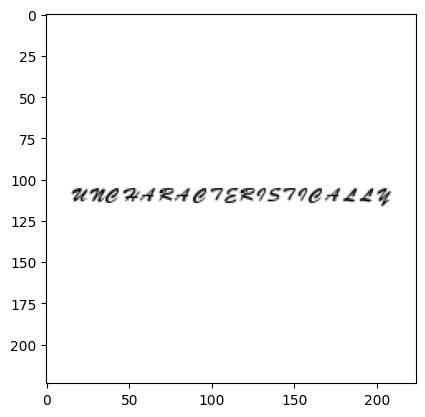

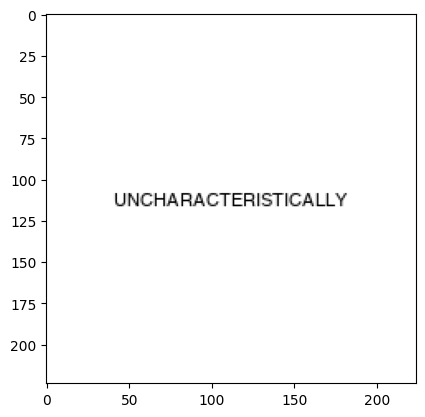

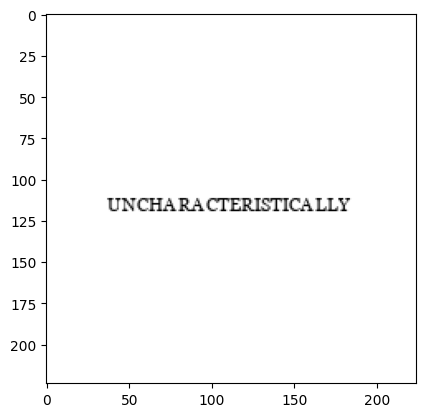

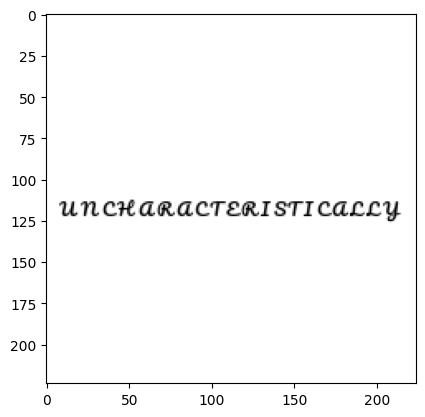

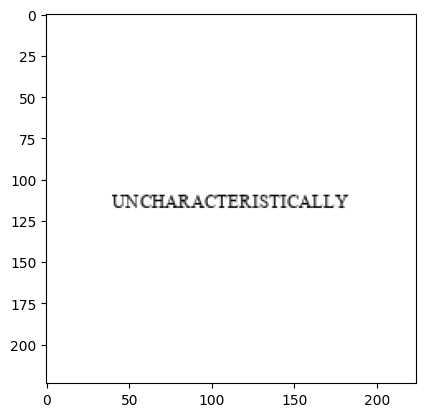

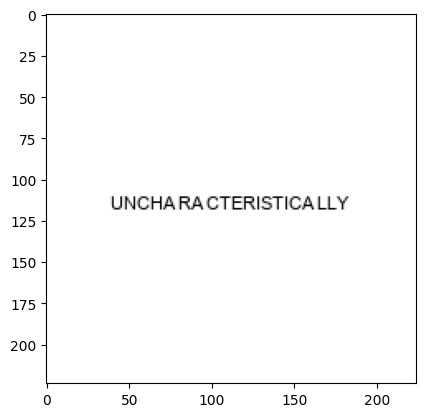

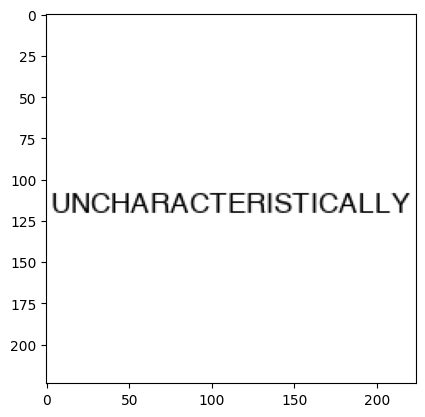

In [73]:
import matplotlib.pyplot as plt

for font in ['brushscriptstd', 'helvetica', 'Georgia', 'Pacifico-Regular', 'Times_New_Roman', 'Arial']:
    img=graphemes.text_to_grapheme(word = "internationalization", fontname=font, size=11, case=[True for _ in range(20)])
    img=graphemes.text_to_grapheme(word = "uncharacteristically", fontname=font, size=11, case=[True for _ in range(20)])
    plt.imshow(img)
    plt.show()

img=graphemes.text_to_grapheme(word = "uncharacteristically", fontname="helvetica", size=17, case=[True for _ in range(20)])
plt.imshow(img)
plt.show()

In [ ]:
graphemes.create_train_dataset(graph_dir, ["the", "theme", "retro"], images_per_word=25)

In [4]:
graphemes.create_test_dataset(graph_dir, ["we", "test"])

In [5]:
graphemes.check_test_dataset(graph_dir)

10584

In [42]:
from pathlib import Path
from typing import Any, Callable, Tuple

import numpy as np
import torch
from torch.utils.data import DataLoader, Sampler
from torchvision.datasets.folder import default_loader

class FoldDeltaDataset(graphemes.RepetitionDataset):
    def __init__(
        self,
        root: Path,
        word_list,
        phoneme_to_id: dict[str, int],
        transform: Callable[..., Any] | None = None,
        loader: Callable[[str], Any] = default_loader,
        is_valid_file: Callable[[str], bool] | None = None,
        allow_empty: bool = False,
        generator = None,
    ):
        super().__init__(
            root, phoneme_to_id, transform, loader, is_valid_file, allow_empty
        )
        self.id_tensor : torch.Tensor= torch.stack(
            [
                torch.tensor(self.class_to_sample_id[class_name], dtype=torch.int)
                for class_name in word_list
            ]
        )
        self.generator = generator
    
    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        print(index)
        new_index = self.id_tensor[index, torch.randint(self.id_tensor.shape[1], (1,))].item()
        return super().__getitem__(new_index)
    
    def __len__(self)->int :
        return len(self.id_tensor)

In [52]:
from torchvision.transforms import ToTensor
from swp.utils.datasets import get_phoneme_to_id

trainset = FoldDeltaDataset(
    root=graph_dir / "train",
    word_list=["the", "retro"],
    phoneme_to_id=get_phoneme_to_id(),
    transform=ToTensor(),
)
other_trainset = FoldDeltaDataset(
    root=graph_dir / "train",
    word_list=["theme"],
    phoneme_to_id=get_phoneme_to_id(),
    transform=ToTensor(),
)
new_trainset = graphemes.IndicedConcatDataset([trainset, other_trainset])
trainloader = DataLoader(new_trainset, 5, shuffle=True, collate_fn=lambda data: graphemes.task_collate_fn(data, 2))

0
0
0
1
torch.Size([3, 3, 224, 224])
([tensor([[65.,  7., 44., 70., 71., 71., 71., 71., 71., 71.],
        [67., 35., 53., 46., 70., 71., 71., 71., 71., 71.]]), tensor([[56., 62., 70., 71., 71., 71., 71., 71., 71., 71.]])], tensor([1, 0, 0]))


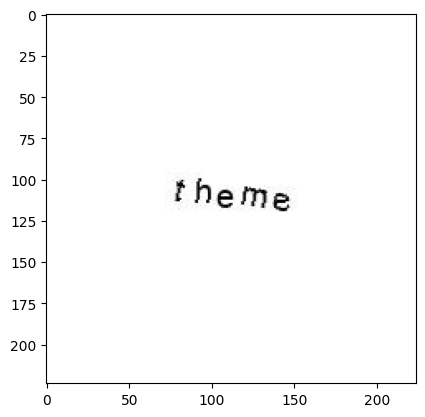

Computing 0-th loss
torch.Size([2, 3, 224, 224])
tensor([[65.,  7., 44., 70., 71., 71., 71., 71., 71., 71.],
        [67., 35., 53., 46., 70., 71., 71., 71., 71., 71.]])


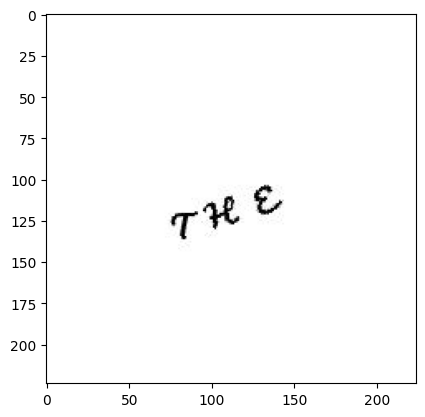

Computing 1-th loss
torch.Size([1, 3, 224, 224])
tensor([[56., 62., 70., 71., 71., 71., 71., 71., 71., 71.]])


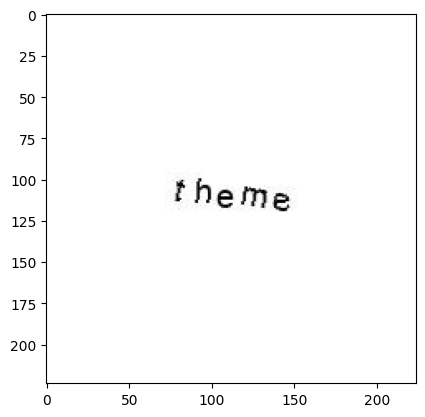

1
1
0
0
torch.Size([3, 3, 224, 224])
([tensor([[67., 35., 53., 46., 70., 71., 71., 71., 71., 71.],
        [65.,  7., 44., 70., 71., 71., 71., 71., 71., 71.]]), tensor([[56., 62., 70., 71., 71., 71., 71., 71., 71., 71.]])], tensor([0, 0, 1]))


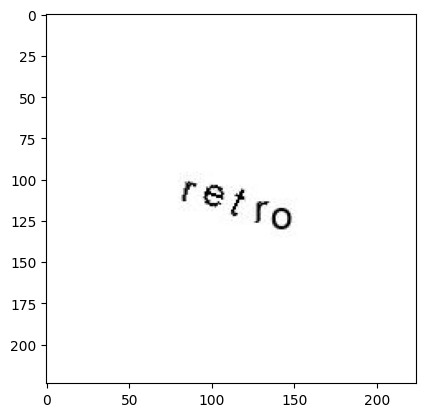

Computing 0-th loss
torch.Size([2, 3, 224, 224])
tensor([[67., 35., 53., 46., 70., 71., 71., 71., 71., 71.],
        [65.,  7., 44., 70., 71., 71., 71., 71., 71., 71.]])


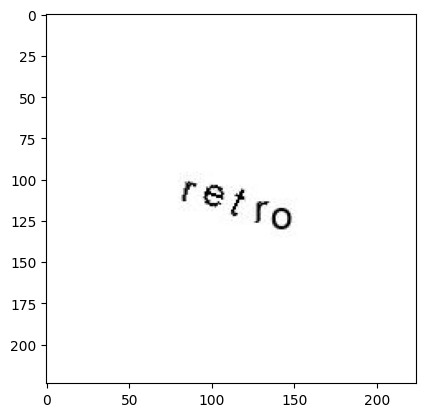

Computing 1-th loss
torch.Size([1, 3, 224, 224])
tensor([[56., 62., 70., 71., 71., 71., 71., 71., 71., 71.]])


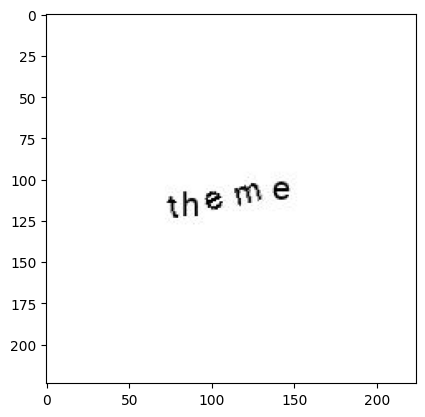

2
0
1
0
torch.Size([3, 3, 224, 224])
([tensor([[65.,  7., 44., 70., 71., 71., 71., 71., 71., 71.],
        [67., 35., 53., 46., 70., 71., 71., 71., 71., 71.]]), tensor([[56., 62., 70., 71., 71., 71., 71., 71., 71., 71.]])], tensor([0, 0, 1]))


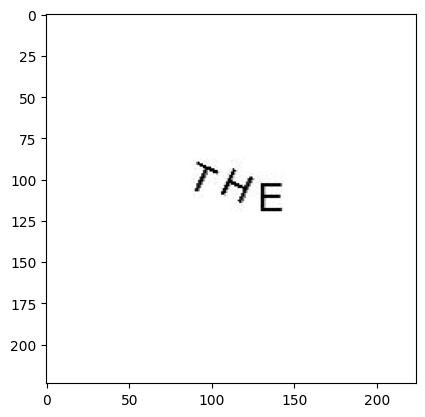

Computing 0-th loss
torch.Size([2, 3, 224, 224])
tensor([[65.,  7., 44., 70., 71., 71., 71., 71., 71., 71.],
        [67., 35., 53., 46., 70., 71., 71., 71., 71., 71.]])


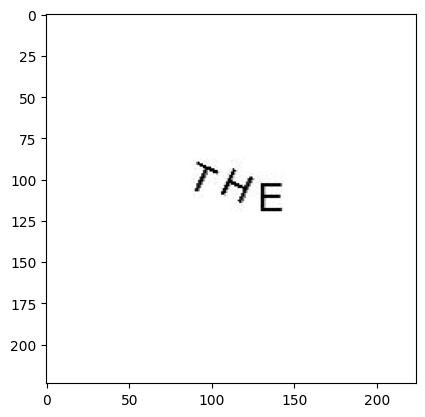

Computing 1-th loss
torch.Size([1, 3, 224, 224])
tensor([[56., 62., 70., 71., 71., 71., 71., 71., 71., 71.]])


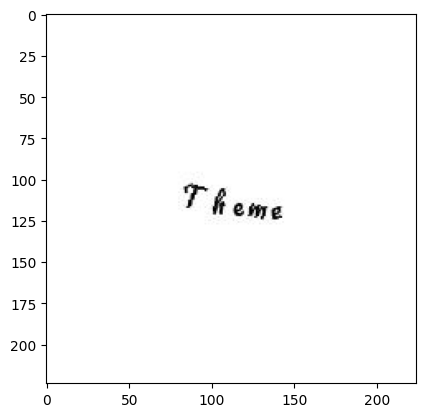

In [62]:
from matplotlib import pyplot as plt

for epoch in range(3):
    print(epoch)
    for data_input, data_label in trainloader:
        data_input : torch.Tensor
        print(data_input.shape)
        print(data_label)
        plt.imshow(data_input[0].permute((1,2,0)).numpy())
        plt.show()
        loss(data_input, data_label)

In [66]:
consonnes = "zrtpqsdfghjklmwxcvbn"
voyelles = "aeyuioé"
for cons in consonnes:
    for voy in voyelles:
        print(f"in{voy}{cons}")

inaz
inez
inyz
inuz
iniz
inoz
inéz
inar
iner
inyr
inur
inir
inor
inér
inat
inet
inyt
inut
init
inot
inét
inap
inep
inyp
inup
inip
inop
inép
inaq
ineq
inyq
inuq
iniq
inoq
inéq
inas
ines
inys
inus
inis
inos
inés
inad
ined
inyd
inud
inid
inod
inéd
inaf
inef
inyf
inuf
inif
inof
inéf
inag
ineg
inyg
inug
inig
inog
inég
inah
ineh
inyh
inuh
inih
inoh
inéh
inaj
inej
inyj
inuj
inij
inoj
inéj
inak
inek
inyk
inuk
inik
inok
inék
inal
inel
inyl
inul
inil
inol
inél
inam
inem
inym
inum
inim
inom
iném
inaw
inew
inyw
inuw
iniw
inow
inéw
inax
inex
inyx
inux
inix
inox
inéx
inac
inec
inyc
inuc
inic
inoc
inéc
inav
inev
inyv
inuv
iniv
inov
inév
inab
ineb
inyb
inub
inib
inob
inéb
inan
inen
inyn
inun
inin
inon
inén
